# Árvores II - Tarefa 2

### 1. Carregar as bases

Vamos carregar as bases lidas na tarefa passada. Se você salvou essas bases em arquivo texto, basta fazer a leitura com o comando ```pd.read_csv``` das seguintes bases:

- X_train
- Y_train
- X_test
- Y_test

Não se esqueça de considerar a leitura dos índices dos arquivos no ```read_csv()```!

In [1]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.13


In [2]:
# Imports
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import graphviz

from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -p numpy,pandas,matplotlib,seaborn,graphviz,sklearn

numpy     : 1.21.5
pandas    : 1.4.4
matplotlib: 3.5.2
seaborn   : 0.11.2
graphviz  : 0.20.1
sklearn   : 1.0.2



In [4]:
# Train
X_ = pd.read_csv('X_train_edit.csv', index_col = [0,1])
X_.head()

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,Subject,,,,,,,,,,,,,,,,,,,,,
0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [5]:
# Train
y_ = pd.read_csv('y_train_edit.csv', index_col = [0,1])
y_.head()

,,0
,Subject,
0,1,5
1,1,5
2,1,5
3,1,5
4,1,5


In [6]:
# Teste
X_test = pd.read_csv('X_test_edit.csv', index_col = [0,1])
X_test.head()

,,1 tBodyAcc-mean()-X,2 tBodyAcc-mean()-Y,3 tBodyAcc-mean()-Z,4 tBodyAcc-std()-X,5 tBodyAcc-std()-Y,6 tBodyAcc-std()-Z,7 tBodyAcc-mad()-X,8 tBodyAcc-mad()-Y,9 tBodyAcc-mad()-Z,10 tBodyAcc-max()-X,...,552 fBodyBodyGyroJerkMag-meanFreq(),553 fBodyBodyGyroJerkMag-skewness(),554 fBodyBodyGyroJerkMag-kurtosis(),"555 angle(tBodyAccMean,gravity)","556 angle(tBodyAccJerkMean),gravityMean)","557 angle(tBodyGyroMean,gravityMean)","558 angle(tBodyGyroJerkMean,gravityMean)","559 angle(X,gravityMean)","560 angle(Y,gravityMean)","561 angle(Z,gravityMean)"
,Subject,,,,,,,,,,,,,,,,,,,,,
0,2,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.071645,-0.330370,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978
1,2,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.401189,-0.121845,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898
2,2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,0.062891,-0.190422,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346
3,2,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,0.116695,-0.344418,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108
4,2,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.121711,-0.534685,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857


In [7]:
# Teste
y_test = pd.read_csv('y_test_edit.csv', index_col = [0,1])
y_test.head()

,,0
,Subject,
0,2,5
1,2,5
2,2,5
3,2,5
4,2,5


### 2. Divisão da base em Treino, Validação e Teste

A base já se encontra dividida em Treino e Validação. O que vamos fazer então é extrair uma base de Validação da base de Treino.

Extraia 25% da base de treino como base de validação.

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(X_, y_, test_size=.25, random_state=100)

### 3. Melhores 3 variáveis

Rode uma árvore com profundidade máxima igual a 4 para prever a atividade humana com todas as variáveis.
Observe a importância das variáveis e considere as 3 variáveis com maior importância para os próximos passos.
Dica: utilize o atributo ```clf.feature_importances_``` da árvore treinada.

In [22]:
clf = DecisionTreeClassifier(random_state=100, max_depth = 4).fit(X_train, y_train)

dot_data = export_graphviz(clf, out_file=None, 
                                feature_names=X_train.columns,  
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph.view()

'Source.gv.png'

In [25]:
# feature_importances é basicamente o quanto essa feature é utilizada em cada árvore
importances = pd.Series(clf.feature_importances_, index = X_train.columns)
importances.sort_values(ascending = False, inplace = True)
importances.head(3)

53 tGravityAcc-min()-X                0.282630
382 fBodyAccJerk-bandsEnergy()-1,8    0.254515
560 angle(Y,gravityMean)              0.171064
dtype: float64

### 4. Construa uma árvore com as 3 melhores variáveis

Utilizando as três variáveis encontradas acima, construa uma árvore de decisão. Encontre o melhor ```ccp_alpha``` utilizando a base de validação, conforme a estrutura que vimos em aula.

In [26]:
X_train_cut = X_train[['53 tGravityAcc-min()-X','382 fBodyAccJerk-bandsEnergy()-1,8','560 angle(Y,gravityMean)']]
X_valid_cut = X_valid[['53 tGravityAcc-min()-X','382 fBodyAccJerk-bandsEnergy()-1,8','560 angle(Y,gravityMean)']]
X_test_cut = X_test[['53 tGravityAcc-min()-X','382 fBodyAccJerk-bandsEnergy()-1,8','560 angle(Y,gravityMean)']]

In [27]:
clf = DecisionTreeClassifier(random_state=100, min_samples_leaf = 20).fit(X_train_cut, y_train)

In [28]:
path = DecisionTreeClassifier(random_state=100, min_samples_leaf = 20).cost_complexity_pruning_path(X_train_cut, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
ccp_alphas

array([0.00000000e+00, 8.72499834e-06, 1.18819807e-05, 1.22476252e-05,
       1.27220264e-05, 1.35732258e-05, 1.44718861e-05, 1.61750434e-05,
       1.64247439e-05, 4.04342029e-05, 4.37757182e-05, 4.46914348e-05,
       4.66345406e-05, 5.15157728e-05, 6.07089600e-05, 6.79032653e-05,
       9.13009089e-05, 1.02975363e-04, 1.05209802e-04, 1.37019360e-04,
       1.62028964e-04, 1.80057796e-04, 1.82944887e-04, 1.99567796e-04,
       2.50381565e-04, 2.88521779e-04, 3.51072513e-04, 3.51399950e-04,
       3.56118310e-04, 3.80765795e-04, 4.23155216e-04, 4.23950370e-04,
       4.39652235e-04, 4.50738329e-04, 4.56635143e-04, 4.59436586e-04,
       4.61909629e-04, 4.96623302e-04, 4.98351324e-04, 5.26134878e-04,
       5.87184924e-04, 5.89721558e-04, 6.40361331e-04, 6.57337940e-04,
       6.95330738e-04, 6.98067847e-04, 7.08635383e-04, 7.24630266e-04,
       7.49133077e-04, 8.15218199e-04, 8.48147630e-04, 9.75661645e-04,
       9.92596071e-04, 1.00315063e-03, 1.03263621e-03, 1.03348526e-03,
      

In [29]:
ccp_alphas = ccp_alphas[::4]
ccp_alphas

array([0.00000000e+00, 1.27220264e-05, 1.64247439e-05, 4.66345406e-05,
       9.13009089e-05, 1.62028964e-04, 2.50381565e-04, 3.56118310e-04,
       4.39652235e-04, 4.61909629e-04, 5.87184924e-04, 6.95330738e-04,
       7.49133077e-04, 9.92596071e-04, 1.06364437e-03, 1.40353351e-03,
       1.68782107e-03, 2.49884313e-03, 3.03345349e-03, 4.65751799e-03,
       4.31255693e-02, 1.86014110e-01])

In [30]:
%%time

# Para cada ccp_alpha construimos uma nova árvore com o parâmetro ccp_alpha=ccp_alpha
# Fitamos isso com a base de treino, pegamos essa árvore e acumulamos na lista de árvores clfs
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=100, ccp_alpha=ccp_alpha).fit(X_train_cut, y_train)
    clfs.append(clf)

Wall time: 539 ms
Compiler : 176 ms


In [31]:
# Para cada árvore clf na lista clfs me traga clf.score(X_train,y_train), ele retorna a acurácia.
train_scores = [clf.score(X_train_cut, y_train) for clf in clfs]
valid_scores = [clf.score(X_valid_cut, y_valid) for clf in clfs]

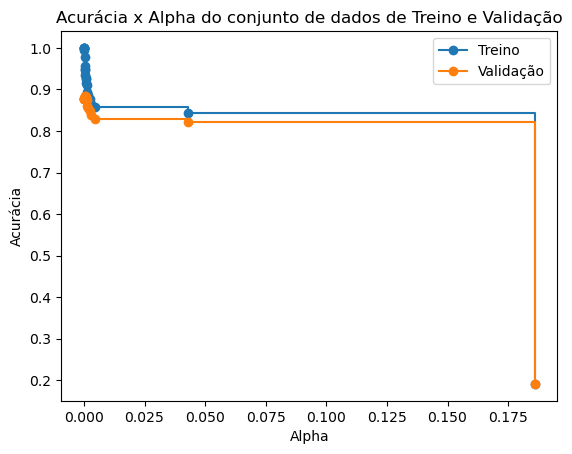

In [32]:
# Gráfico de acurácia x ccp_alpha
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x Alpha do conjunto de dados de Treino e Validação")
ax.plot(ccp_alphas, train_scores, marker='o', label="Treino",
        drawstyle="steps-post")
ax.plot(ccp_alphas, valid_scores, marker='o', label="Validação",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [33]:
ind_best_tree = len(valid_scores) - valid_scores[::-1].index(max(valid_scores)) - 1
best_tree = clfs[ind_best_tree]
best_tree

DecisionTreeClassifier(ccp_alpha=0.00043965223508205106, random_state=100)

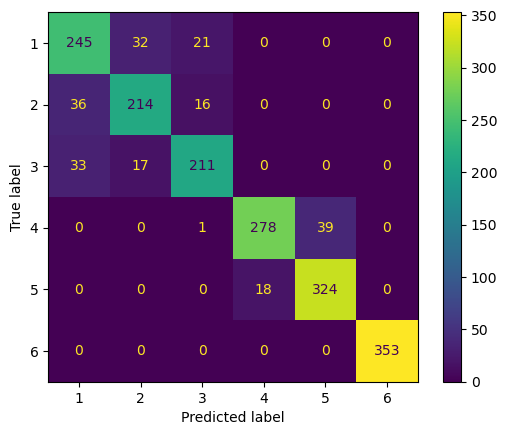

In [34]:
# Melhor acurácia
ConfusionMatrixDisplay.from_estimator(best_tree, X_valid_cut, y_valid, display_labels=best_tree.classes_);

In [35]:
validation_accuracy= best_tree.score(X_valid_cut, y_valid)

print(f'Acurácia: {validation_accuracy*100:.2f}%')


Acurácia: 88.41%


### 5. Avaliação do modelo

Avalie a árvore encontrada no item anterior na base de testes.

Acurácia: 72.65%


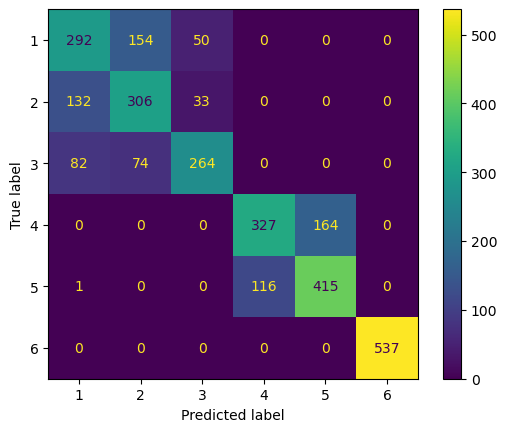

In [36]:
test_accuracy = best_tree.score(X_test_cut, y_test)

print(f'Acurácia: {test_accuracy*100:.2f}%')
ConfusionMatrixDisplay.from_estimator(best_tree, X_test_cut, y_test, display_labels=best_tree.classes_);